# MNIST Handwritten Image Classification

## Importing Libraries and Datasets

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Data Visualisation

In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28*28."
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28*28."

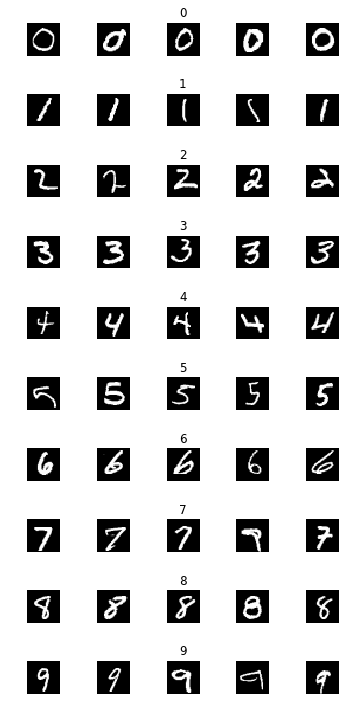

In [6]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axes = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axes[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        axes[j][i].axis("off")
        if i == 2:
            axes[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

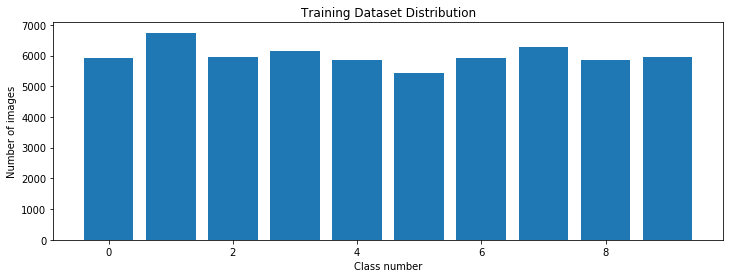

In [8]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Training Dataset Distribution")
plt.xlabel("Class number")
plt.ylabel("Number of images")

## Pre-processing and one-hot-encoding

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [13]:
#num_pixels = 784

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## LeNET Model

In [18]:
def lenet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape = (28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(15, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [19]:
model = lenet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
__________

In [20]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 500, verbose = 1, shuffle = True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 31s 578us/step - loss: 0.3897 - acc: 0.8742 - val_loss: 0.0669 - val_acc: 0.9798
Epoch 2/10
54000/54000 [==============================] - 29s 546us/step - loss: 0.0733 - acc: 0.9773 - val_loss: 0.0592 - val_acc: 0.9835
Epoch 3/10
54000/54000 [==============================] - 43s 804us/step - loss: 0.0550 - acc: 0.9827 - val_loss: 0.0448 - val_acc: 0.9888
Epoch 4/10
54000/54000 [==============================] - 39s 714us/step - loss: 0.0428 - acc: 0.9861 - val_loss: 0.0571 - val_acc: 0.9838
Epoch 5/10
54000/54000 [==============================] - 30s 558us/step - loss: 0.0356 - acc: 0.9887 - val_loss: 0.0407 - val_acc: 0.9885
Epoch 6/10
54000/54000 [==============================] - 29s 546us/step - loss: 0.0349 - acc: 0.9891 - val_loss: 0.0590 - val_acc: 0.9822
Epoch 7/10
54000/54000 [==============================] - 30s 547us/step - loss: 0.0308 - acc: 0.9900 - val_loss: 0.0

Text(0.5, 0, 'epoch')

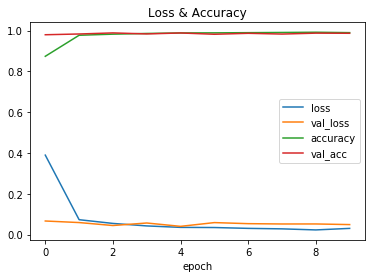

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_acc'])
plt.title('Loss & Accuracy')
plt.xlabel('epoch')

In [22]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test Score:', score[0])
print(['Test Accuracy:', score[1]])

<class 'list'>
Test Score: 0.046694366208204705
['Test Accuracy:', 0.987]


## Testing Sample Image

In [23]:
import cv2

In [43]:
img = cv2.imread('sample.png')

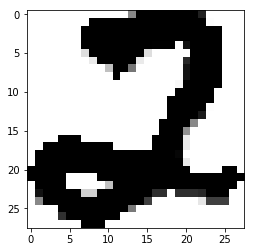

In [44]:
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

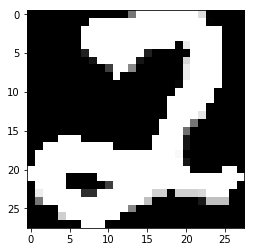

In [45]:
image = cv2.bitwise_not(img)
plt.imshow(image, cmap = 'gray')

In [46]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [47]:
prediction = model.predict_classes(image)
print(str(prediction))

[2]
